# Decision Tree Classifier model 
It is a type of Ensemble Learning which is of Sequential Learners group.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,accuracy_score, classification_report, roc_auc_score, roc_curve
import seaborn as sns
from sklearn import tree

### Loading the data
This dataset is a cleaned and merged version of different datasets of the HOME CREDIT DEFAULT RISK which can be found at https://www.kaggle.com/competitions/home-credit-default-risk and is exported as reduced CSV after the data cleaning, feature selection and labelling.

In [4]:
#Loading the dataset
app_data = pd.read_csv('/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/application_train_upsampled.csv')
app_data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_INCOME_TYPE_2,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_FAMILY_STATUS_0,NAME_FAMILY_STATUS_1,NAME_FAMILY_STATUS_2
0,1,100003,0,0,1,0,0,270000.0,1293502.5,35698.5,...,0,0,1,0,0,1,0,0,0,1
1,2,100004,0,1,0,1,1,67500.0,135000.0,6750.0,...,0,1,0,0,1,0,0,1,0,0
2,3,100007,0,0,0,0,1,121500.0,513000.0,21865.5,...,0,1,0,0,1,0,0,1,0,0
3,4,100008,0,0,0,0,1,99000.0,490495.5,27517.5,...,0,0,1,0,1,0,0,0,0,1
4,5,100009,0,0,1,1,1,171000.0,1560726.0,41301.0,...,0,1,0,0,0,1,0,0,0,1


In [5]:
app_data["TARGET"].value_counts()

0    168113
1    168113
Name: TARGET, dtype: int64

#### Splitting into training and test

In [6]:
#Splitting into train and test dataset
X = app_data.iloc[:,3:]
y = app_data['TARGET']
print(X.shape, y.shape)


(336226, 57) (336226,)


In [7]:
#Splitting into training and testing data into 80% and 20% respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(336226, 57) (235358, 57) (100868, 57) (336226,) (235358,) (100868,)


### Defining the Decision Tree model

In [8]:
params = tree.DecisionTreeClassifier()

In [9]:
#fitting the model
model = params.fit(X_train, y_train)

In [10]:
y_pred = model.predict(X_test)

#### Confusion Matrix plot for Hyperprameter tuned model

/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


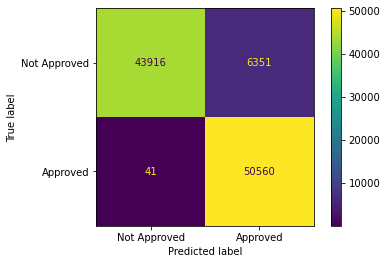

In [11]:
y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test, values_format ='d', display_labels = ['Not Approved','Approved'])

In [13]:
#Best parameters
#print(model.best_params)

#Best score
#print(model.best_score_)

#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     50267
           1       0.89      1.00      0.94     50601

    accuracy                           0.94    100868
   macro avg       0.94      0.94      0.94    100868
weighted avg       0.94      0.94      0.94    100868



In [14]:
print(accuracy_score(y_test,y_pred))

0.9366300511559662


### Plotting the ROC and AUC curve

/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


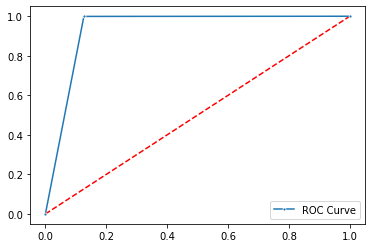

In [16]:
probs = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
sns.lineplot([0,1],[0,1], color='red', linestyle='--')
plt = sns.lineplot(fpr, tpr, marker = '.',label='ROC Curve')

In [18]:
print(roc_auc_score(y_test, probs[:,1]))

0.9364222116603608
